<a href="https://colab.research.google.com/github/ChahineBA/Financial-Inclusion-In-Africa/blob/main/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Variables
Var = pd.read_csv("/content/VariableDefinitions.csv")
Var

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#Reading Test and Train Files
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')
test = pd.read_csv('/content/Test.csv')
combine = [train_df,test_df]

In [ ]:
#Training Dataset Exploration
train_df.info()
train_df.describe()
train_df.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [ ]:
#Test Dataset Exploration
test_df.info()
test_df.describe()
test_df.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


,country,uniqueid,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,10086,10086,10086,10086,10086,10086,10086,10086,10086
unique,4,7313,2,2,2,6,5,6,10
top,Rwanda,uniqueid_8633,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,3745,3,6189,7559,5847,5487,4663,5479,2773


In [ ]:
#Training Dataset Overview
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Drop Duplicates:
for dataset in combine:
     dataset.drop_duplicates(inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [ ]:
X_train = train_df.drop("bank_account",axis=1)
y_train = train_df["bank_account"]

In [ ]:
#Mapping Bank account
bank_map = {"No":0 , "Yes":1}
train_df["bank_account"] = train_df["bank_account"].map(bank_map).astype(int)

In [ ]:
train_df.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [ ]:
test_df.info()
test_df.country.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [ ]:
#converting Country
country_map = {"Kenya":0,"Rwanda":1,"Tanzania":2,"Uganda":3}
for dataset in combine:
     dataset["country"] = dataset["country"].map(country_map).astype(int)

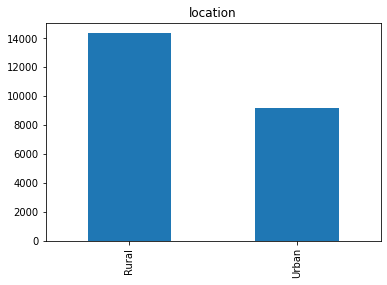

In [ ]:
#visulizing Location
train_df['location_type'].value_counts().plot(kind='bar', title='location')

In [ ]:
train_df[["location_type","bank_account"]].groupby(by="location_type",as_index=False).mean().sort_values(by="bank_account",ascending=False)

,location_type,bank_account
1,Urban,0.178739
0,Rural,0.116503


In [ ]:
#Converting location
location_map = {"Rural":0,"Urban":1}
for dataset in combine:
     dataset["location_type"] = dataset["location_type"].map(location_map).astype(int)

In [ ]:
#Creating a new Feature: Household or not
for dataset in combine:
     dataset.loc[(dataset["relationship_with_head"]=="Head of Household"),"IsHead"] = 1
     dataset.loc[~((dataset["relationship_with_head"]=="Head of Household")),"IsHead"] = 0

In [ ]:
 #Cellphone
train_df.cellphone_access.unique()
train_df[["cellphone_access","bank_account"]].groupby(by="cellphone_access",as_index=False).mean().sort_values(by="bank_account",ascending=False)

,cellphone_access,bank_account
1,Yes,0.183797
0,No,0.017133


In [ ]:
#Converting Cellphone
cell_map = {"No":0,"Yes":1}
for dataset in combine:
     dataset["cellphone_access"] = dataset["cellphone_access"].map(cell_map).astype(int)

In [ ]:
#Converting gender
gender_map = {"Female":0,"Male":1}
for dataset in combine:
     dataset["gender_of_respondent"] = dataset["gender_of_respondent"].map(gender_map).astype(int)

In [ ]:
train_df[["relationship_with_head","bank_account"]].groupby(by="relationship_with_head",as_index=False).mean().sort_values(by="bank_account",ascending=False)

,relationship_with_head,bank_account
1,Head of Household,0.177149
5,Spouse,0.106595
2,Other non-relatives,0.105263
3,Other relative,0.098802
0,Child,0.086586
4,Parent,0.059853


In [ ]:
#Converting job:
for dataset in combine:
     dataset.loc[(dataset["job_type"]=="Government Dependent") | (dataset["job_type"]=="Formally employed Government") ,"IsPublic"] = 1
     dataset.loc[~((dataset["job_type"]=="Government Dependent") | (dataset["job_type"]=="Formally employed Government")),"IsPublic"] = 0

In [ ]:
#Creating a new Feature: Married or not
for dataset in combine:
     dataset.loc[(dataset["marital_status"]=="Married/Living together"),"IsMarried"] = 1
     dataset.loc[~((dataset["marital_status"]=="Married/Living together")),"IsMarried"] = 0

In [ ]:
#Education
train_df[["education_level","bank_account"]].groupby(by="education_level",as_index=False).mean().sort_values(by="bank_account",ascending=False)

,education_level,bank_account
5,Vocational/Specialised training,0.570361
4,Tertiary education,0.510804
1,Other/Dont know/RTA,0.314286
3,Secondary education,0.232773
2,Primary education,0.085451
0,No formal education,0.038981


In [ ]:
#Creating a new Feature: Educated or not
for dataset in combine:
     dataset.loc[(dataset["education_level"]=="Primary education") | (dataset["education_level"]=="Secondary education") | (dataset["education_level"]=="Tertiary education") ,"IsEdu"] = 1
     dataset.loc[~((dataset["education_level"]=="Primary education") | (dataset["education_level"]=="Secondary education") | (dataset["education_level"]=="Tertiary education")),"IsEdu"] = 0

In [ ]:
#Converting age
for dataset in combine:
    dataset.loc[ dataset['age_of_respondent'] <= 16, 'age_of_respondent'] = 0
    dataset.loc[(dataset['age_of_respondent'] > 16) & (dataset['age_of_respondent'] <= 32), 'age_of_respondent'] = 1
    dataset.loc[(dataset['age_of_respondent'] > 32) & (dataset['age_of_respondent'] <= 48), 'age_of_respondent'] = 2
    dataset.loc[(dataset['age_of_respondent'] > 48) & (dataset['age_of_respondent'] <= 64), 'age_of_respondent'] = 3
    dataset.loc[ dataset['age_of_respondent'] > 64, 'age_of_respondent'] = 4

In [ ]:
train_df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,IsHead,IsPublic,IsMarried,IsEdu
0,0,2018,uniqueid_1,1,0,1,3,1,0,Spouse,Married/Living together,Secondary education,Self employed,0.0,0.0,1.0,1.0
1,0,2018,uniqueid_2,0,0,0,5,4,0,Head of Household,Widowed,No formal education,Government Dependent,1.0,1.0,0.0,0.0
2,0,2018,uniqueid_3,1,1,1,5,1,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0.0,0.0,0.0,0.0
3,0,2018,uniqueid_4,0,0,1,5,2,0,Head of Household,Married/Living together,Primary education,Formally employed Private,1.0,0.0,1.0,1.0
4,0,2018,uniqueid_5,0,1,0,8,1,1,Child,Single/Never Married,Primary education,Informally employed,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,uniqueid_2113,0,0,1,4,2,0,Head of Household,Divorced/Seperated,No formal education,Other Income,1.0,0.0,0.0,0.0
23520,3,2018,uniqueid_2114,0,0,1,2,1,0,Head of Household,Single/Never Married,Secondary education,Other Income,1.0,0.0,0.0,1.0
23521,3,2018,uniqueid_2115,0,0,1,5,1,0,Parent,Widowed,Primary education,Other Income,0.0,0.0,0.0,1.0
23522,3,2018,uniqueid_2116,0,1,1,7,1,0,Parent,Divorced/Seperated,Secondary education,Self employed,0.0,0.0,0.0,1.0


In [ ]:
train_df = train_df.drop(["year","uniqueid","relationship_with_head","marital_status","education_level","job_type","age_of_respondent"],axis=1)
test_df = test_df.drop(["year","relationship_with_head","marital_status","education_level","job_type","age_of_respondent"],axis=1)

In [ ]:
train_df

,country,bank_account,location_type,cellphone_access,household_size,gender_of_respondent,IsHead,IsPublic,IsMarried,IsEdu
0,0,1,0,1,3,0,0.0,0.0,1.0,1.0
1,0,0,0,0,5,0,1.0,1.0,0.0,0.0
2,0,1,1,1,5,1,0.0,0.0,0.0,0.0
3,0,0,0,1,5,0,1.0,0.0,1.0,1.0
4,0,0,1,0,8,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
23519,3,0,0,1,4,0,1.0,0.0,0.0,0.0
23520,3,0,0,1,2,0,1.0,0.0,0.0,1.0
23521,3,0,0,1,5,0,0.0,0.0,0.0,1.0
23522,3,0,1,1,7,0,0.0,0.0,0.0,1.0


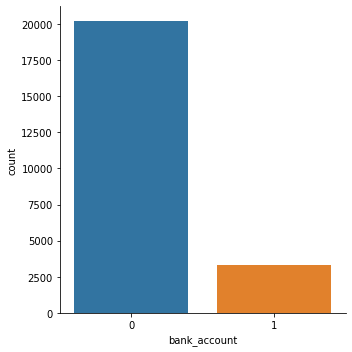

In [ ]:
sns.catplot(x="bank_account",kind="count",data=train_df)

In [ ]:
#Modeling
X = train_df.drop("bank_account",axis=1).values
y = train_df["bank_account"].values

In [ ]:
from sklearn.model_selection import train_test_split
import pathlib
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((18819, 9), (18819,), (4705, 9), (4705,))

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto', kernel='rbf', C=5)
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train)
print(1-acc_knn)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, y_train)
print(1-acc_log)

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

In [ ]:
# Support Vector Machines
svc = SVC(gamma='auto', kernel='rbf', C=5)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print(1-acc_svc)

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(1-acc_gaussian)

In [ ]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_train,y_train)
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_test)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, xg_y_model))

In [ ]:
GBC = GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]
                 }
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBC.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=1000,
                           subsample=0.2)

 The best score across ALL searched params:
 0.8691748262821598

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.2}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.86950053, 0.86546227, 0.86418704, 0.8629118 , 0.86160714])

In [ ]:
df = pd.DataFrame(dict(model=['Logistic Regression',
                              'Random Forest',
                              'Gradient Boosting',
                              'SVM'],accuracy=[1 - lg_pred_score, 1 - rf_pred_score,
                                               1 - gb_pred_score, 1 - svc_pred_score]))
df

In [ ]:
sample = pd.read_csv('/content/SampleSubmission.csv')
sample

In [ ]:
X_train = train_df.drop('bank_account', axis=1)
y_train = train_df['bank_account']
X_test = test_df.drop('uniqueid', axis=1).copy()

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': pd.DataFrame(X_train).columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances

,Attribute,Importance
2,2,0.399981
6,6,0.161050
1,1,0.114357
0,0,0.096763
5,5,0.081182
4,4,0.071003
7,7,0.028120
8,8,0.026329
3,3,0.021215


In [ ]:
model = SVC(gamma='auto', kernel='rbf', C=5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": predictions})

In [ ]:
submission.to_csv('12_submission.csv', index = False)